# The Datasets API: Features Overview

This tutorial provides an overview of the [Datasets data source](https://docs.dimensions.ai/dsl/datasource-datasets.html) available via the [Dimensions Analytics API](https://docs.dimensions.ai/dsl/). 

The topics covered in this notebook are:

* How to retrieve datasets metadata using the [search fields](https://docs.dimensions.ai/dsl/datasource-datasets.html) available
* How to use the [schema API](https://docs.dimensions.ai/dsl/data-sources.html#metadata-api) to obtain some statistics about the Datasets data available (a standalone version of the charts generated in this section is also available online: [dataset fields overview ](http://api-sample-data.dimensions.ai/dataviz-exports/1-introducing-datasets/dataset-fields-overview.html) | [distribution of dataset fields per years](http://api-sample-data.dimensions.ai/dataviz-exports/1-introducing-datasets/dataset-fields-by-year-count.html) ).

In [1]:
import datetime
print("==\nCHANGELOG\nThis notebook was last run on %s\n==" % datetime.date.today().strftime('%b %d, %Y'))

==
CHANGELOG
This notebook was last run on Jan 25, 2022
==


## Prerequisites

This notebook assumes you have installed the [Dimcli](https://pypi.org/project/dimcli/) library and are familiar with the ['Getting Started' tutorial](https://api-lab.dimensions.ai/cookbooks/1-getting-started/1-Using-the-Dimcli-library-to-query-the-API.html).

In [2]:
!pip install dimcli plotly tqdm -U --quiet 

import dimcli
from dimcli.utils import *

import os, sys, time, json
from tqdm.notebook import tqdm as progress
import pandas as pd
import plotly.express as px
from plotly.offline import plot
if not 'google.colab' in sys.modules:
  # make js dependecies local / needed by html exports
  from plotly.offline import init_notebook_mode
  init_notebook_mode(connected=True)

print("==\nLogging in..")
# https://digital-science.github.io/dimcli/getting-started.html#authentication
ENDPOINT = "https://app.dimensions.ai"
if 'google.colab' in sys.modules:
  import getpass
  KEY = getpass.getpass(prompt='API Key: ')  
  dimcli.login(key=KEY, endpoint=ENDPOINT)
else:
  KEY = ""
  dimcli.login(key=KEY, endpoint=ENDPOINT)
dsl = dimcli.Dsl()

Searching config file credentials for 'https://app.dimensions.ai' endpoint..


==
Logging in..
Dimcli - Dimensions API Client (v0.9.6)
Connected to: <https://app.dimensions.ai/api/dsl> - DSL v2.0
Method: dsl.ini file


## 1. Sample Dataset Queries

For the following queries, we will restrict our search using the keyword 'graphene'. You can of course change that, so to explore other topics too.

In [3]:
TOPIC = "graphene" #@param {type: "string"}

### Searching datasets by keyword

We can easily discover datasets mentioning the keyword `graphene` and sorting them by most recent first. 

In [6]:
df = dsl.query(f"""
search datasets 
    in full_data for "{TOPIC}" 
return datasets[basics+license_name+license_url] 
    sort by date_created limit 100
""").as_dataframe()

Returned Datasets: 100 (total = 1845)
Time: 0.74s


In [7]:
df.head(3)

,authors,id,keywords,license_name,license_url,title,year,journal.id,journal.title
0,"[{'name': 'Huaxu Zhou'}, {'name': 'Yao Ding'},...",dataset.57983323,"[electrochemical detection, silica nanochannel...",CC BY 4.0,https://creativecommons.org/licenses/by/4.0/,DataSheet1_Silica Nanochannel Array Film Suppo...,2022,NaN,NaN
1,"[{'name': 'Francesca Zummo'}, {'name': 'Pietro...",dataset.57980490,"[hippocampal neurons, graphene, chemical funct...",CC BY 4.0,https://creativecommons.org/licenses/by/4.0/,Table_1_Bidirectional Modulation of Neuronal C...,2022,NaN,NaN
2,"[{'name': 'Vipin Singh'}, {'name': 'Shanta Raj...",dataset.57980625,"[chromeno spirooxindoles, azomethine ylides, h...",CC BY 4.0,https://creativecommons.org/licenses/by/4.0/,DataSheet1_Graphene Oxide Catalyzed Synthesis ...,2022,NaN,NaN


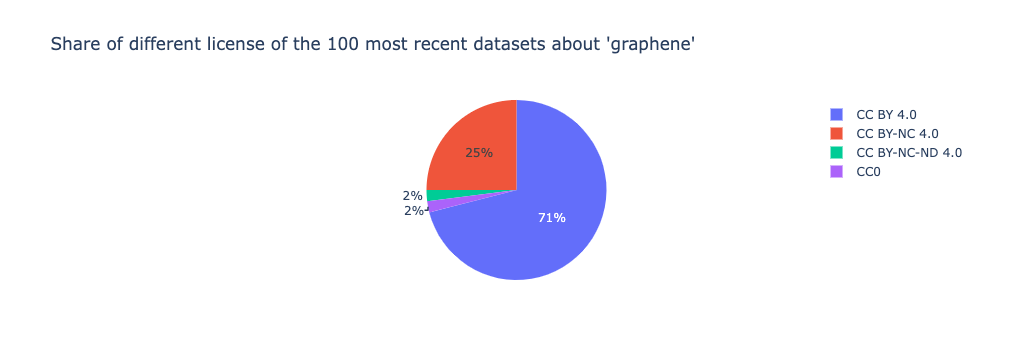

In [9]:
px.pie(df, 
       names="license_name", 
       title=f"Share of different license of the 100 most recent datasets about '{TOPIC}'")

### Returning associated grants and publication data

Whenever the information about the publication associated to a dataset is available, it can be retrieved via the `associated_publication_id` field. Similarly, links between datasets and grants are exposed via the `associated_grant_ids` field. 

In [10]:
dfPubsAndGrants = dsl.query(f"""
search datasets 
    in full_data for "{TOPIC}" 
    where associated_grant_ids is not empty
    and  associated_publication_id is not empty
return datasets[basics+associated_publication_id+associated_grant_ids+category_for] 
    sort by date_created desc limit 50
""").as_dataframe()

Returned Datasets: 50 (total = 426)
Time: 0.61s


In [11]:
dfPubsAndGrants.head(3)

,associated_grant_ids,associated_publication_id,authors,category_for,id,keywords,title,year,journal.id,journal.title
0,"[grant.8128998, grant.9211019, grant.8122546, ...",pub.1144550732,"[{'name': 'Kai Sun'}, {'name': 'Chen Wang'}, {...","[{'id': '2209', 'name': '09 Engineering'}, {'i...",dataset.57932510,"[synthetic structural control, sulfur redox ki...",Ion-Selective\nCovalent Organic Framework Memb...,2022,jour.1041450,ACS Applied Materials & Interfaces
1,"[grant.8158929, grant.8160387]",pub.1143784077,"[{'name': 'Yilan Li'}, {'name': 'Kaiguang Yang...","[{'id': '2210', 'name': '10 Technology'}, {'id...",dataset.57827484,"[contain specific biomarkers, comparative prot...",Surface Nanosieving Polyether Sulfone Particle...,2021,jour.1345331,Analytical Chemistry
2,"[grant.8158929, grant.8160387]",pub.1143784077,"[{'name': 'Yilan Li'}, {'name': 'Kaiguang Yang...","[{'id': '2210', 'name': '10 Technology'}, {'id...",dataset.57827485,"[contain specific biomarkers, comparative prot...",Surface Nanosieving Polyether Sulfone Particle...,2021,jour.1345331,Analytical Chemistry


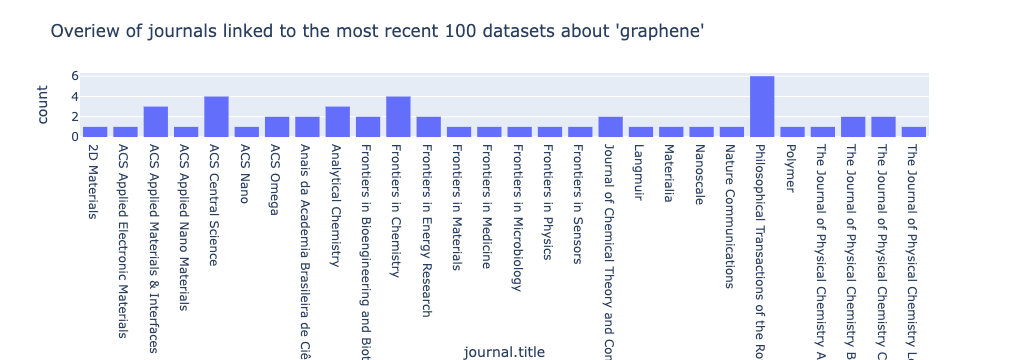

In [12]:
fig = px.histogram(dfPubsAndGrants.sort_values('journal.title'), 
                   x="journal.title", 
                   barmode="group", 
                   title=f"Overiew of journals linked to the most recent 100 datasets about '{TOPIC}'")
fig.show()

### Searching using fielded search

We can search for Datasets by using one or more [field filters](https://docs.dimensions.ai/dsl/datasource-datasets.html#datasets-fields). 

For example, we can filter by `journal`, using the most frequent journal from the dataframe created above. 

In [13]:
topjournal = dfPubsAndGrants['journal.id'].value_counts().idxmax()

dsl.query(f"""
search datasets 
    in full_data for "{TOPIC}"
    where journal.id="{topjournal}"
return datasets[basics+doi] limit 10
""").as_dataframe()

Returned Datasets: 6 (total = 6)
Time: 0.59s


,authors,doi,id,keywords,title,year,journal.id,journal.title
0,"[{'name': 'Sivasambu Bohm', 'orcid': '0000-000...",10.6084/m9.figshare.14555480.v1,dataset.25043107,"[graphene, graphene production, graphene oxide...",S6. Raman spectra of exfoliated graphene from ...,2021,jour.1312330,Philosophical Transactions of the Royal Societ...
1,"[{'name': 'Sivasambu Bohm', 'orcid': '0000-000...",10.6084/m9.figshare.14555483.v1,dataset.25043106,"[graphene, graphene production, graphene oxide...",S10. XPS of high pressure exfoliated graphene ...,2021,jour.1312330,Philosophical Transactions of the Royal Societ...
2,"[{'name': 'Sivasambu Bohm', 'orcid': '0000-000...",10.6084/m9.figshare.14555486.v1,dataset.25043105,"[graphene, graphene production, graphene oxide...",S8. FEG-TEM images of electrochemically exfola...,2021,jour.1312330,Philosophical Transactions of the Royal Societ...
3,"[{'name': 'Sivasambu Bohm', 'orcid': '0000-000...",10.6084/m9.figshare.14555492.v1,dataset.25043104,"[graphene, graphene production, graphene oxide...",S7. Scanning electron micrographs of exfoliate...,2021,jour.1312330,Philosophical Transactions of the Royal Societ...
4,"[{'name': 'Sivasambu Bohm', 'orcid': '0000-000...",10.6084/m9.figshare.14555498.v1,dataset.25043103,"[graphene, graphene production, graphene oxide...",S5. X-ray diffractogram of high purity Ceylon ...,2021,jour.1312330,Philosophical Transactions of the Royal Societ...
5,"[{'name': 'Sivasambu Bohm', 'orcid': '0000-000...",10.6084/m9.figshare.14555495.v1,dataset.25043102,"[graphene, graphene production, graphene oxide...",S9. FEG-TEM images of high pressure exfoliated...,2021,jour.1312330,Philosophical Transactions of the Royal Societ...


### Extracting related funding via grants 

In [14]:
# get unique list of associated grant IDs
grantids = list()
for g in dfPubsAndGrants['associated_grant_ids'].to_list():
  grantids += g
grantids = list(set(grantids))

# get more grants data from IDs
dfgrants = dsl.query(f"""search grants 
                      where id in {json.dumps(grantids)} 
                   return grants[id+funding_org_name+funder_countries+funding_eur] limit 1000 """).as_dataframe()


Returned Grants: 76 (total = 76)
Time: 0.67s


In [15]:
dfgrants.head(5)

,funder_countries,funding_eur,funding_org_name,id
0,"[{'id': 'GB', 'name': 'United Kingdom'}]",309195.0,Engineering and Physical Sciences Research Cou...,grant.9471332
1,"[{'id': 'GB', 'name': 'United Kingdom'}]",638897.0,Engineering and Physical Sciences Research Cou...,grant.9343057
2,"[{'id': 'JP', 'name': 'Japan'}]",1554506.0,Japan Society for the Promotion of Science,grant.9408491
3,"[{'id': 'US', 'name': 'United States'}]",1021052.0,Directorate for Biological Sciences,grant.9382740
4,"[{'id': 'JP', 'name': 'Japan'}]",NaN,Japan Science and Technology Agency,grant.9618989


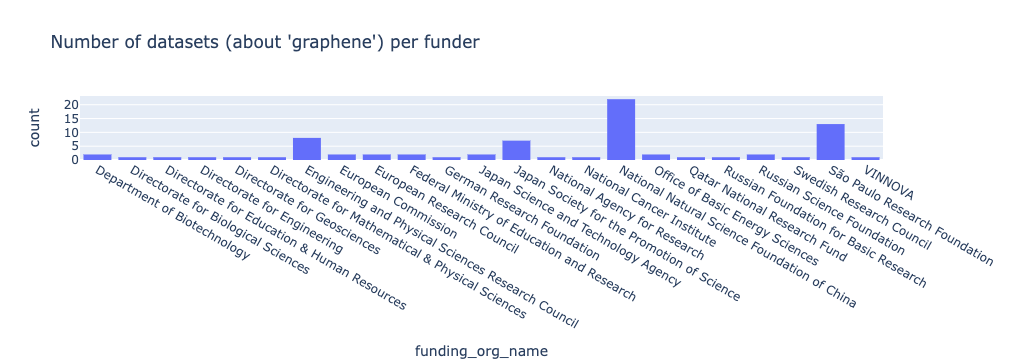

In [16]:
fig = px.histogram(dfgrants.sort_values('funding_org_name'), 
                   x="funding_org_name", 
                   barmode="group", 
                   title=f"Number of datasets (about '{TOPIC}') per funder")
fig.show()

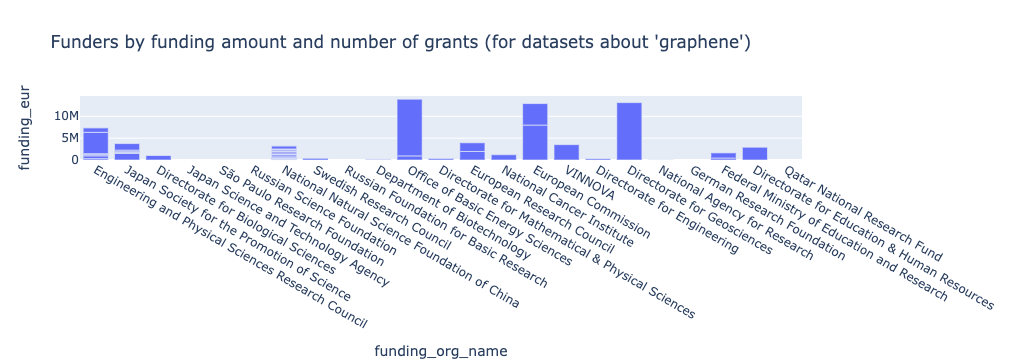

In [17]:
fig = px.bar(dfgrants, 
             x="funding_org_name", y="funding_eur", 
             barmode="group", 
             title=f"Funders by funding amount and number of grants (for datasets about '{TOPIC}')")
fig.show()

In [18]:
dfgrants.sort_values('funding_eur',ascending=False).head(5)

,funder_countries,funding_eur,funding_org_name,id
52,"[{'id': 'US', 'name': 'United States'}]",13119051.0,Directorate for Geosciences,grant.6624030
59,"[{'id': 'US', 'name': 'United States'}]",12963140.0,Office of Basic Energy Sciences,grant.4319701
43,"[{'id': 'BE', 'name': 'Belgium'}]",7992278.0,European Commission,grant.7506166
65,"[{'id': 'BE', 'name': 'Belgium'}]",4910624.0,European Commission,grant.4273765
61,"[{'id': 'GB', 'name': 'United Kingdom'}]",4899323.0,Engineering and Physical Sciences Research Cou...,grant.4576887


### Aggregating results using facets

Datasets results can be grouped using facets. E.g. we can see what are the top `funders`, `research organizations` or  `researchers` related to our datasets (note: the column 'count' represents the number of dataset records in each of the groups).

#### Top funders

In [19]:
df = dsl.query(f"""
search datasets 
    in full_data for "{TOPIC}" 
return funders limit 100
""").as_dataframe()

Returned Funders: 100
Time: 0.61s


In [20]:
df.head(3)

,acronym,city_name,count,country_name,id,latitude,linkout,longitude,name,types,state_name
0,NSFC,Beijing,178,China,grid.419696.5,40.005177,[http://www.nsfc.gov.cn/publish/portal1/],116.339830,National Natural Science Foundation of China,[Government],NaN
1,EC,Brussels,73,Belgium,grid.270680.b,50.851650,[http://ec.europa.eu/index_en.htm],4.363670,European Commission,[Government],NaN
2,EPSRC,Swindon,66,United Kingdom,grid.421091.f,51.567093,[https://www.epsrc.ac.uk/],-1.784602,Engineering and Physical Sciences Research Cou...,[Government],England


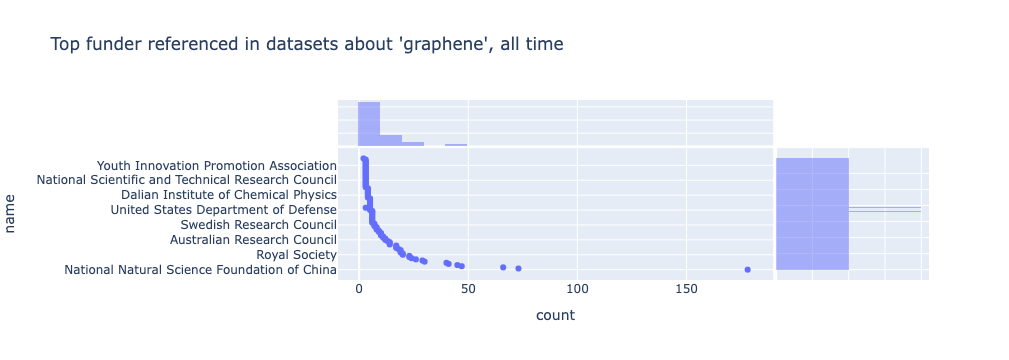

In [21]:
px.scatter(df, 
           x="count", y="name",
           marginal_x="histogram", marginal_y="histogram",
           title=f"Top funder referenced in datasets about '{TOPIC}', all time")

#### Top research organizations

Note: research organizations are linked to datasets via the datasets' associated publication. 

In [22]:
df = dsl.query(f"""
search datasets 
    in full_data for "{TOPIC}" 
return research_orgs limit 10
""").as_dataframe()

Returned Research_orgs: 10
Time: 0.52s


In [23]:
df.head()

,acronym,city_name,count,country_name,id,latitude,linkout,longitude,name,types,state_name
0,UM,Kuala Lumpur,26,Malaysia,grid.10347.31,3.120833,[https://www.um.edu.my/],101.656390,University of Malaya,[Education],NaN
1,UPM,Seri Kembangan,16,Malaysia,grid.11142.37,2.992025,[http://www.upm.edu.my/],101.716240,Universiti Putra Malaysia,[Education],NaN
2,FHI,Berlin,16,Germany,grid.418028.7,52.448765,[http://www.fhi-berlin.mpg.de/],13.283713,Fritz Haber Institute of the Max Planck Society,[Facility],NaN
3,KNU,Kyiv,15,Ukraine,grid.34555.32,50.441902,[http://www.univ.kiev.ua/en/],30.511314,Taras Shevchenko National University of Kyiv,[Education],NaN
4,NaN,Cambridge,15,United Kingdom,grid.5335.0,52.204453,[http://www.cam.ac.uk/],0.114908,University of Cambridge,[Education],NaN


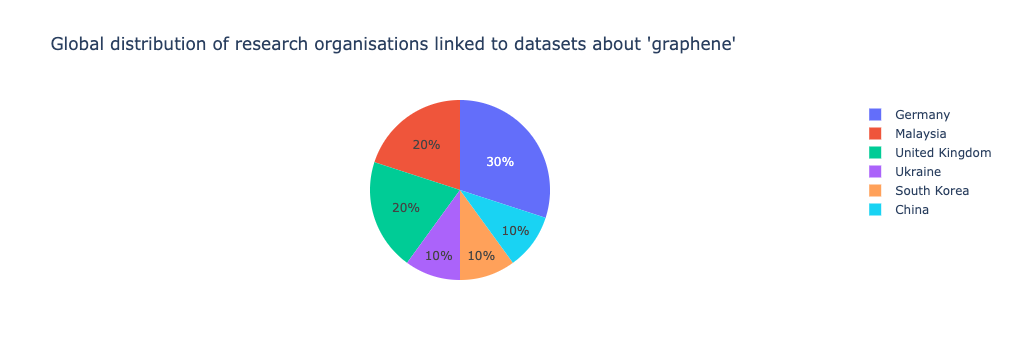

In [24]:
px.pie(df, 
       names="country_name",
       title=f"Global distribution of research organisations linked to datasets about '{TOPIC}'")

#### Top contributors

Note: researchers are linked to datasets via the datasets' associated publication. 

In [25]:
dsl.query(f"""
search datasets 
    in full_data for "{TOPIC}" 
return researchers limit 10
""").as_dataframe()

Returned Researchers: 10
Time: 0.60s


,count,first_name,id,last_name,research_orgs,orcid_id
0,15,Benjamin,ur.01046566370.94,Frank,"[grid.6734.6, grid.418028.7, grid.419564.b]",NaN
1,15,Robert,ur.01333027111.96,Schlögl,"[grid.5379.8, grid.423905.9, grid.410726.6, gr...",NaN
2,15,Oleksiy V,ur.01347070166.03,Khavryuchenko,"[grid.34555.32, grid.415616.1, grid.418751.e, ...",NaN
3,15,Klaus E,ur.013720757463.40,Hermann,"[grid.4372.2, grid.5164.6, grid.14095.39, grid...",[0000-0002-3861-3916]
4,15,Annette,ur.0714064131.80,Trunschke,"[grid.418028.7, grid.440957.b, grid.4372.2, gr...",NaN
5,13,Xinliang,ur.0750742345.75,Feng,"[grid.5335.0, grid.419547.a, grid.4488.0, grid...",[0000-0003-3885-2703]
6,12,Shahabaldin,ur.010553550461.38,Rezania,"[grid.31501.36, grid.263333.4, grid.410877.d]",[0000-0001-8943-3045]
7,12,Ali Akbar,ur.011210700466.21,Mohammadi,[grid.502998.f],NaN
8,12,Seyedeh Solmaz,ur.01230367167.34,Talebi,"[grid.508797.4, grid.444858.1, grid.411705.6]",NaN
9,12,Nahid Tavakkoli,ur.012742050435.43,Nezhad,[grid.411583.a],NaN


## 2. A closer look at Datasets statistics

The Dimensions Search Language [exposes programmatically metadata](https://docs.dimensions.ai/dsl/data-sources.html#metadata-api), such as supported sources and entities, along with their fields, facets, fieldsets, metrics and search fields. 


In [26]:
%dsldocs datasets

,sources,field,type,description,is_filter,is_entity,is_facet
0,datasets,associated_grant_ids,string,The Dimensions IDs of the grants linked to the...,True,False,False
1,datasets,associated_publication,publication_links,Publication linked to the dataset (single value).,True,True,True
2,datasets,associated_publication_id,string,The Dimensions ID of the publication linked to...,True,False,False
3,datasets,authors,json,Ordered list of the dataset authors. ORCIDs ar...,True,False,False
4,datasets,category_bra,categories,`Broad Research Areas <https://dimensions.fres...,True,True,True
5,datasets,category_for,categories,`ANZSRC Fields of Research classification <htt...,True,True,True
6,datasets,category_hra,categories,`Health Research Areas <https://dimensions.fre...,True,True,True
7,datasets,category_hrcs_hc,categories,`HRCS - Health Categories <https://dimensions....,True,True,True
8,datasets,category_hrcs_rac,categories,`HRCS – Research Activity Codes <https://dimen...,True,True,True
9,datasets,category_icrp_cso,categories,`ICRP Common Scientific Outline <https://dimen...,True,True,True


The fields list shown above can be extracted via the following DSL query:

In [27]:
data = dsl.query("""describe source datasets""")
fields = sorted([x for x in data.fields.keys()])

### Counting records per each field

By using the fields list obtained above, it is possible to draw up some general statistics re. the Datasets content type in Dimensions.

In order to do this, we  use the operator `is not empty` to generate automatically queries like this `search datasets where {field_name} is not empty return datasets limit 1` and then use the `total_count` field in the JSON we get back for our statistics. 

In [28]:
q_template = """search datasets where {} is not empty return datasets[id] limit 1"""

# seed results with total number of orgs
total = dsl.query("""search datasets return datasets[id] limit 1""", verbose=False).count_total
stats = [
    {'filter_by': 'no filter (=all records)', 'results' : total}
]

for f in progress(fields):
    q = q_template.format(f)
    res = dsl.query(q, verbose=False)
    time.sleep(0.5)
    stats.append({'filter_by': f, 'results' : res.count_total})


df = pd.DataFrame().from_dict(stats)
df.sort_values("results", inplace=True, ascending=False)
df

  0%|          | 0/39 [00:00<?, ?it/s]

,filter_by,results
0,no filter (=all records),11231163
17,date_inserted,11231163
32,repository_id,11231163
25,id,11231163
22,figshare_url,11231163
21,doi,11231163
20,dimensions_url,11231163
38,title,11230951
29,language_title,11222040
28,language_desc,11222040


### Creating a bar chart

> NOTE: a standalone version of this chart is also [available online](http://api-sample-data.dimensions.ai/dataviz-exports/1-introducing-datasets/dataset-fields-overview.html)

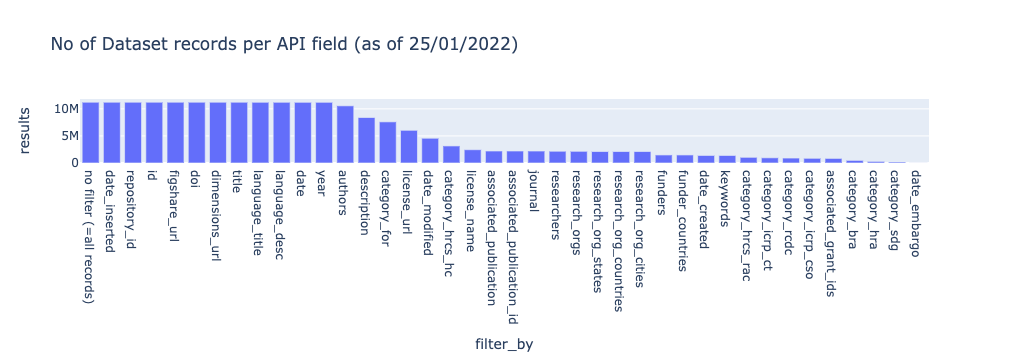

In [29]:
from datetime import date
today = date.today().strftime("%d/%m/%Y")

fig = px.bar(df, 
             x=df['filter_by'], 
             y=df['results'],
             title=f"No of Dataset records per API field (as of {today})")

plot(fig, filename = 'dataset-fields-overview.html', auto_open=False)
fig.show()

### Counting the yearly distribution of field/records data 



In [30]:
#
# get how many dataset records have values for each field, for each year
#

q_template = """search datasets where {} is not empty return year limit 150"""

# seed with all records data (no filter)
seed = dsl.query("""search datasets return year limit 150""", verbose=False).as_dataframe()
seed['segment'] = "all records"

for f in progress(fields):
    q = q_template.format(f)
    res = dsl.query(q, verbose=False).as_dataframe()
    res['segment'] = f
    seed = seed.append(res, ignore_index=True )
    time.sleep(0.5)

seed = seed.rename(columns={'id' : 'year'})
seed = seed.astype({'year': 'int32'})

#
# fill in (normalize) missing years in order to build a line chart
#

yrange = [seed['year'].min(), seed['year'].max()]
# TIP yrange[1]+1 to make sure max value is included
all_years = [x for x in range(yrange[0], yrange[1]+1)]  

def add_missing_years(field_name):
    global seed
    known_years = list(seed[seed["segment"] == field_name]['year'])
    l = [] 
    for x in all_years:
        if x not in known_years:
            l.append({'segment' : field_name , 'year' : x, 'count': 0 })
    seed = seed.append(l, ignore_index=True )
    
all_field_names = seed['segment'].value_counts().index.tolist()
for field in all_field_names:
    add_missing_years(field)
    

  0%|          | 0/39 [00:00<?, ?it/s]

### Creating a line chart 

> NOTE: a standalone version of this chart is also [available online](http://api-sample-data.dimensions.ai/dataviz-exports/1-introducing-datasets/dataset-fields-by-year-count.html)

A few things to remember: 

* There are a lot of overlapping lines, as many fields appear frequently; hence it's useful to click on the right panel to hide/reveal specific segments.  
* We set a start year to avoid having a long tail of (very few) datasets published a long time ago. 

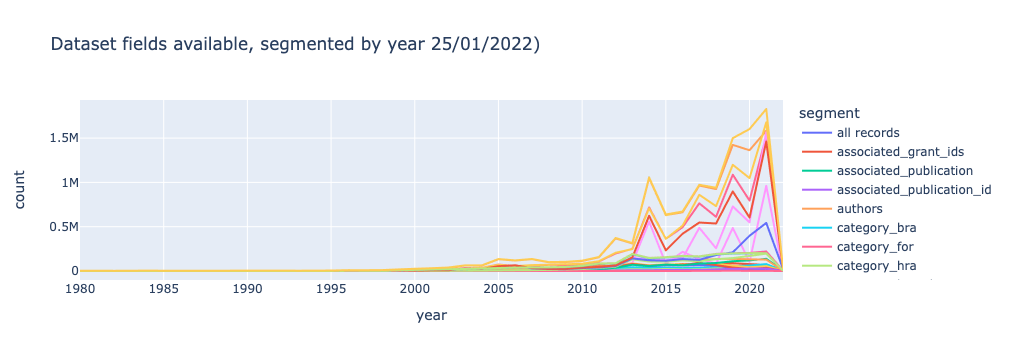

In [31]:
start_year = 1980

# need to sort otherwise the chart is messed up!
temp = seed.query(f"year >= {start_year}").sort_values(["segment", "year"]) 
# 
fig = px.line(temp, 
              x="year", 
              y="count", 
              color="segment",
               title=f"Dataset fields available, segmented by year {today})")

plot(fig, filename = 'dataset-fields-by-year-count.html', auto_open=False)
fig.show()

## Where to find out more



Please have a look at the [official documentation](https://docs.dimensions.ai/dsl/datasource-datasets.html) for more information on Datasets.